You have to generate heat maps of confusion matrices and calculate the
evaluation metrics such as accuracy, precision, recall for classification type problem and for
other perform segmentation and clustering.

Classify Customer Churn: Identify which customers are likely to leave a telecom
company based on usage patterns.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:00:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


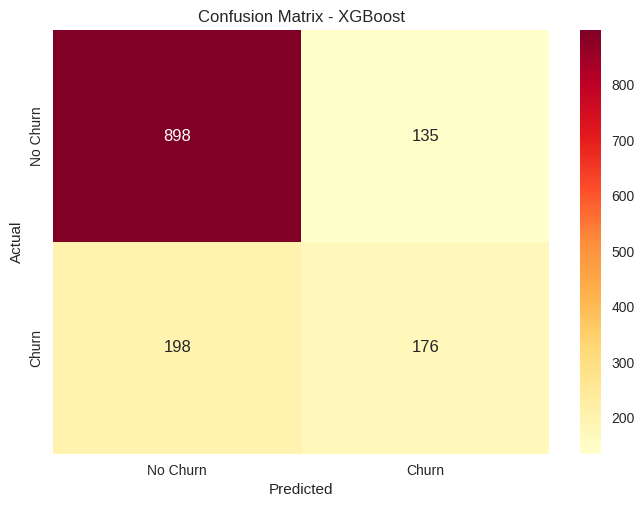

Accuracy: 76.33262260127933
Precision: 56.59163987138264
Recall: 47.05882352941176


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("5. Classify Customer Churn.csv")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(inplace=True)
df.drop("customerID", axis=1, inplace=True)
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
